<a href="https://colab.research.google.com/github/tiagoalvescordeiro/global-solution-enchentes/blob/main/modelo_random_forest_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌊 Previsão de Enchentes com Random Forest
Projeto de Machine Learning - Global Solution FIAP 2025.1

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import joblib


## 📥 Carregamento dos dados

In [3]:
from google.colab import files

# Faça upload de ‘dados_enchentes.csv’ via interface do Colab
uploaded = files.upload()
csv_path = '/content/dados_enchentes.csv'

df = pd.read_csv(csv_path)
df.head()




Saving dados_enchentes.csv to dados_enchentes (1).csv


,chuva_1h,chuva_6h,chuva_24h,nivel_rio,tendencia_rio,umidade,vento,risco_enchente
0,11.236204,5.168172,42.233766,4.455204,1,84.184121,15.184256,0
1,28.521429,53.135463,69.647585,3.185725,0,79.828272,13.185351,0
2,21.959818,54.063512,44.252621,4.270048,1,68.477853,3.169941,0
3,17.959755,63.742990,22.175633,7.081291,0,90.650227,19.224789,0
4,4.680559,72.609133,30.158968,5.949972,1,88.340209,6.481145,0


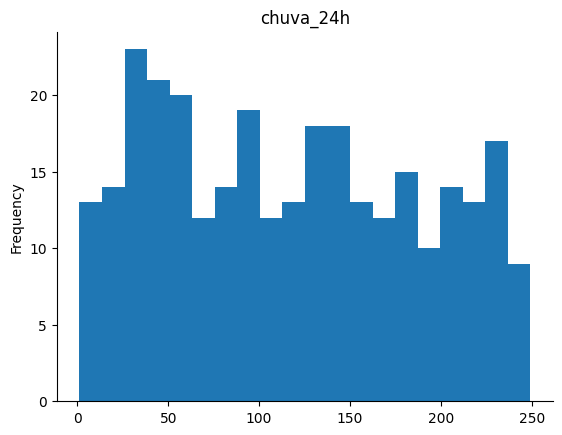

In [4]:
# @title chuva_24h

from matplotlib import pyplot as plt
df['chuva_24h'].plot(kind='hist', bins=20, title='chuva_24h')
plt.gca().spines[['top', 'right',]].set_visible(False)

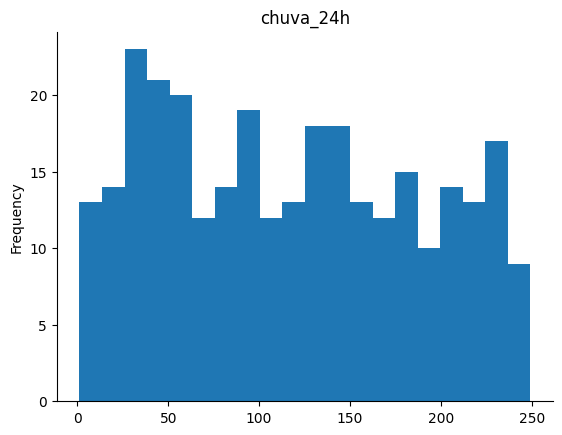

In [6]:
# @title chuva_24h

from matplotlib import pyplot as plt
df['chuva_24h'].plot(kind='hist', bins=20, title='chuva_24h')
plt.gca().spines[['top', 'right',]].set_visible(False)

## 🔧 Pré-processamento

In [5]:
# === CÉLULA 3 AJUSTADA: Pré‐processamento e separação de X e y ===

# 1. Confirmação das colunas (já vimos que inclui 'risco_enchente')
print("Colunas disponíveis no DataFrame:")
print(df.columns.tolist())

# 2. Nome exato da coluna-alvo
nome_exato_do_alvo = 'risco_enchente'

# 3. Opcional: remover espaços em volta (caso existisse algo estranho)
# df.columns = df.columns.str.strip().str.lower()
# nome_exato_do_alvo = nome_exato_do_alvo.lower()

# 4. Verifica se realmente existe antes de prosseguir
if nome_exato_do_alvo not in df.columns:
    raise KeyError(f"A coluna '{nome_exato_do_alvo}' não foi encontrada em df.columns: {df.columns.tolist()}")

# 5. Exemplo genérico de tratamento de nulos (ajuste conforme necessidade)
df = df.dropna()

# 6. Agora separa X e y usando 'risco_enchente'
X = df.drop(columns=[nome_exato_do_alvo])
y = df[nome_exato_do_alvo]

print(f"Shape de X: {X.shape} | Shape de y: {y.shape}")

# 7. Se houver variáveis categóricas, one-hot encode (exemplo genérico)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 8. Exibe a distribuição da variável-alvo
print("\nDistribuição das classes (y):")
print(y.value_counts())




Colunas disponíveis no DataFrame:
['chuva_1h', 'chuva_6h', 'chuva_24h', 'nivel_rio', 'tendencia_rio', 'umidade', 'vento', 'risco_enchente']
Shape de X: (300, 7) | Shape de y: (300,)

Distribuição das classes (y):
risco_enchente
0    287
1     13
Name: count, dtype: int64


In [6]:
# Após carregar o DataFrame (df = pd.read_csv(...)), execute:
print("Colunas disponíveis no DataFrame:")
print(df.columns.tolist())


Colunas disponíveis no DataFrame:
['chuva_1h', 'chuva_6h', 'chuva_24h', 'nivel_rio', 'tendencia_rio', 'umidade', 'vento', 'risco_enchente']


## 🤖 Treinamento com Random Forest

In [11]:
# Cria o modelo; ajuste hiperparâmetros conforme desejar
modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Treina o modelo — repare que usa UNDERSCORE, sem espaços:
modelo.fit(X_train, y_train)



RandomForestClassifier(n_jobs=-1, random_state=42)

In [12]:
# Dividindo os dados em conjuntos de treino e teste
# Ajuste test_size e random_state conforme necessário
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

Shape de X_train: (240, 7)
Shape de X_test: (60, 7)
Shape de y_train: (240,)
Shape de y_test: (60,)


## 📊 Avaliação do Modelo

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[58  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       0.00      0.00      0.00         2

    accuracy                           0.97        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.93      0.97      0.95        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# Dividindo os dados em conjuntos de treino e teste
# Ajuste test_size e random_state conforme necessário
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

# Cria o modelo; ajuste hiperparâmetros conforme desejar
# Mova esta célula para DEPOIS da divisão dos dados
modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Treina o modelo USANDO os dados de TREINO (X_train e y_train)
modelo.fit(X_train, y_train)

# === Adicione esta etapa para fazer as previsões no conjunto de teste ===
# Use o modelo treinado para prever os rótulos para os dados de teste (X_test)
y_pred = modelo.predict(X_test)
# ======================================================================


# Agora y_pred está definido e pode ser usado para avaliação
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Shape de X_train: (240, 7)
Shape de X_test: (60, 7)
Shape de y_train: (240,)
Shape de y_test: (60,)
[[58  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       0.00      0.00      0.00         2

    accuracy                           0.97        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.93      0.97      0.95        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[58  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       0.00      0.00      0.00         2

    accuracy                           0.97        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.93      0.97      0.95        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


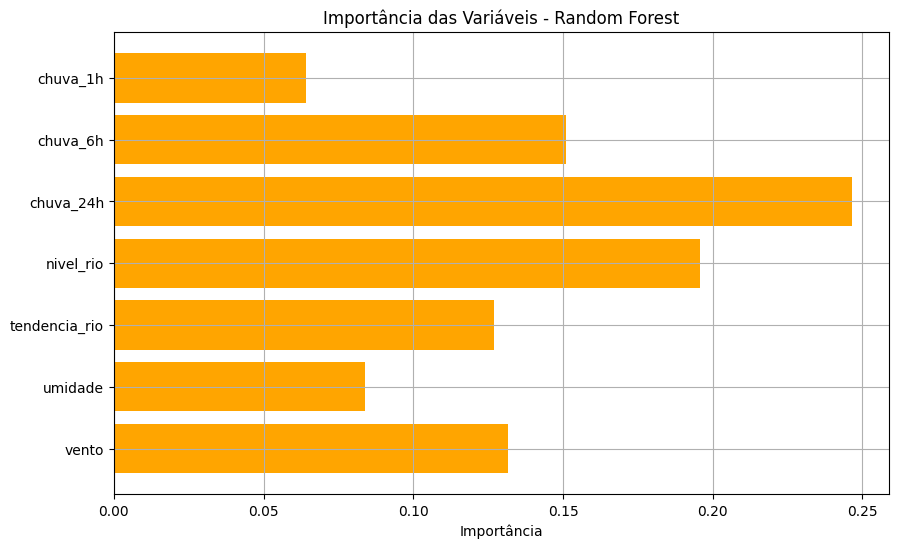

In [17]:
importancias = modelo.feature_importances_
nomes_variaveis = X.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_variaveis, importancias, color='orange')
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Random Forest')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [18]:
import joblib
joblib.dump(modelo, 'modelo_risco_enchente.pkl')


['modelo_risco_enchente.pkl']

In [19]:
import os
os.listdir()


['.config',
 'dados_enchentes.csv',
 'modelo_risco_enchente.pkl',
 'dados_enchentes (1).csv',
 'sample_data']

## 🌟 Importância das Variáveis

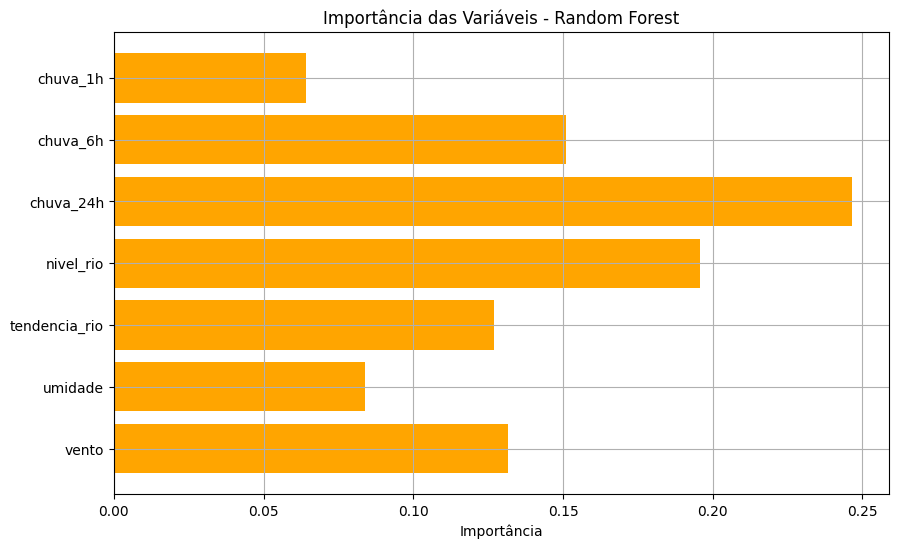

In [20]:
importancias = modelo.feature_importances_
nomes_variaveis = X.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_variaveis, importancias, color='orange')
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Random Forest')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

## 💾 Exportar modelo

In [25]:
joblib.dump(modelo, '../modelo/modelo_risco.pkl')

['../modelo/modelo_risco.pkl']

In [22]:
import os
import joblib

# Cria o diretório de destino se ele não existir
# exist_ok=True evita um erro se o diretório já existir
os.makedirs('../modelo', exist_ok=True)

# Agora salve o modelo no caminho especificado
joblib.dump(modelo, '../modelo/modelo_risco.pkl')

# Você pode verificar se o arquivo foi salvo listando o conteúdo do diretório
# import os
# print(os.listdir('../modelo'))

['../modelo/modelo_risco.pkl']

In [23]:
import os
os.listdir('../modelo')


['modelo_risco.pkl']

In [24]:
import os
os.makedirs('../modelo', exist_ok=True)
